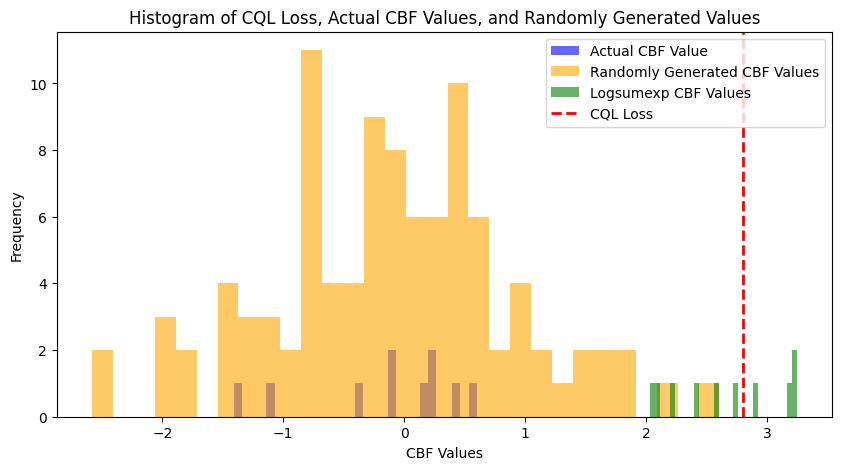

In [15]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Simulated data (replace these with actual values from your model)
batch_size = 10
num_samples = 10

# Generate random actual CBF values
actual_next_h = torch.randn(batch_size)  # Simulated actual CBF values

# Generate random CBF values from sampled actions
random_next_h_samples = torch.randn(batch_size, num_samples)  # Simulated random CBF values

# Compute logsumexp over the action dimension
all_h_values = torch.cat([random_next_h_samples, actual_next_h.unsqueeze(1)], dim=1)
logsumexp_h = torch.logsumexp(all_h_values, dim=1)

# Compute CQL loss
loss_cql_actions = torch.mean(logsumexp_h - actual_next_h)

# Convert to NumPy for visualization
actual_next_h_np = actual_next_h.numpy()
random_next_h_samples_np = random_next_h_samples.numpy().flatten()
logsumexp_h_np = logsumexp_h.numpy()
cql_loss_np = np.full(batch_size, loss_cql_actions.item())  # Uniform values for loss visualization

# Plot histogram
plt.figure(figsize=(10, 5))
plt.hist(actual_next_h_np, bins=30, alpha=0.6, label='Actual CBF Value', color='blue')
plt.hist(random_next_h_samples_np, bins=30, alpha=0.6, label='Randomly Generated CBF Values', color='orange')
plt.hist(logsumexp_h_np, bins=30, alpha=0.6, label='Logsumexp CBF Values', color='green')
plt.axvline(loss_cql_actions.item(), color='red', linestyle='dashed', linewidth=2, label='CQL Loss')

plt.xlabel('CBF Values')
plt.ylabel('Frequency')
plt.title('Histogram of CQL Loss, Actual CBF Values, and Randomly Generated Values')
plt.legend()
plt.show()


In [34]:
import torch

# Assume we have a batch of 3 states, and we sample 4 random actions per state.
# Each CBF value is a scalar.
cbf_values_sample1 = torch.tensor([0.1, 0.2, 0.3]).view(-1, 1)  # First sampled action (shape 3x1)
cbf_values_sample2 = torch.tensor([0.4, 0.5, 0.6]).view(-1, 1)  # Second sampled action (shape 3x1)
cbf_values_sample3 = torch.tensor([0.7, 0.8, 0.9]).view(-1, 1)  # Third sampled action (shape 3x1)
cbf_values_sample4 = torch.tensor([1.0, 1.1, 1.2]).view(-1, 1)  # Fourth sampled action (shape 3x1)

# Put them in a list (this is similar to what happens inside your loop)
all_log_sum_exp = [cbf_values_sample1, cbf_values_sample2, cbf_values_sample3, cbf_values_sample4]

# Stack along dim=1 (i.e., create a new dimension at index 1)
all_h_values = torch.stack(all_log_sum_exp, dim=0)  # Concatenate along dimension 1

print("All Log Sum Exp (List of Tensors):")
print(all_log_sum_exp)

print("\nStacked Tensor (all_h_values):")
print(all_h_values)

print("\nShape of Stacked Tensor:")
print(all_h_values.shape)
# print(all_h_values.mean(axis=2))

All Log Sum Exp (List of Tensors):
[tensor([[0.1000],
        [0.2000],
        [0.3000]]), tensor([[0.4000],
        [0.5000],
        [0.6000]]), tensor([[0.7000],
        [0.8000],
        [0.9000]]), tensor([[1.0000],
        [1.1000],
        [1.2000]])]

Stacked Tensor (all_h_values):
tensor([[[0.1000],
         [0.2000],
         [0.3000]],

        [[0.4000],
         [0.5000],
         [0.6000]],

        [[0.7000],
         [0.8000],
         [0.9000]],

        [[1.0000],
         [1.1000],
         [1.2000]]])

Shape of Stacked Tensor:
torch.Size([4, 3, 1])


In [18]:
print(torch.rand(5, 2,) - 2)

tensor([[-1.1235, -1.4445],
        [-1.5033, -1.6909],
        [-1.5213, -1.2881],
        [-1.5909, -1.7303],
        [-1.5108, -1.2781]])


In [21]:
import torch

# Simulating a simple CBF function: h(s) = s1 + 0.5 * s2
def cbf(states):
    return states[:, 0] + 0.5 * states[:, 1]

# Simulating function to sample random actions
def sample_random_actions(batch_size, num_samples, action_dim=2):
    return torch.randn(batch_size, num_samples, action_dim) * 0.1  # Small noise

# Batch size (number of states) and random samples per state
batch_size = 3
num_samples = 2
state_dim = 2

# Fake input states and next states
state = torch.tensor([[1.0, 1.0], [2.0, 2.0], [3.0, 3.0]])  # (batch_size, state_dim)
next_state = torch.tensor([[1.2, 1.1], [2.1, 2.3], [3.5, 3.2]])  # (batch_size, state_dim)

# Safe mask (all are safe in this example)
safe_mask = torch.tensor([True, True, True])

# Select safe states
safe_states = state[safe_mask]  # (batch_size, state_dim)
print("Safe States:\n", safe_states)

# Get actual next states and their CBF values
actual_next_states = next_state[safe_mask]  # (batch_size, state_dim)
actual_next_h = cbf(actual_next_states)  # (batch_size,)
print("\nActual Next States:\n", actual_next_states)
print("\nCBF Values of Actual Next States:\n", actual_next_h)

# Sample random actions
random_actions = sample_random_actions(batch_size, num_samples)  # (batch_size, num_samples, action_dim)
print("\nRandom Actions:\n", random_actions)

# Compute random next states
random_next_states = safe_states[:, None, :] + random_actions  # (batch_size, num_samples, state_dim)
print("\nRandom Next States:\n", random_next_states)

# Compute CBF values for random next states
random_next_h = cbf(random_next_states)  # (batch_size, num_samples)
print("\nCBF Values of Random Next States:\n", random_next_h)

# Compute logsumexp
logsumexp_h = torch.logsumexp(random_next_h, dim=1)  # (batch_size,)
print("\nLog-Sum-Exp of CBF Values for Random Next States:\n", logsumexp_h)

# Compute loss
loss_cql_actions = torch.mean(logsumexp_h - actual_next_h)
print("\nFinal Loss (CQL Actions):", loss_cql_actions.item())


Safe States:
 tensor([[1., 1.],
        [2., 2.],
        [3., 3.]])

Actual Next States:
 tensor([[1.2000, 1.1000],
        [2.1000, 2.3000],
        [3.5000, 3.2000]])

CBF Values of Actual Next States:
 tensor([1.7500, 3.2500, 5.1000])

Random Actions:
 tensor([[[-0.0177, -0.1057],
         [-0.0128,  0.0097]],

        [[-0.0038, -0.0712],
         [-0.0937,  0.0464]],

        [[ 0.0071,  0.0481],
         [-0.0199, -0.0925]]])

Random Next States:
 tensor([[[0.9823, 0.8943],
         [0.9872, 1.0097]],

        [[1.9962, 1.9288],
         [1.9063, 2.0464]],

        [[3.0071, 3.0481],
         [2.9801, 2.9075]]])

CBF Values of Random Next States:
 tensor([[1.4759, 1.3991],
        [2.9493, 2.9520],
        [4.4971, 4.5018]])

Log-Sum-Exp of CBF Values for Random Next States:
 tensor([2.1314, 3.6438, 5.1926])

Final Loss (CQL Actions): 0.28929147124290466


In [41]:
import torch

# Create sample state and next_state data
# Each row contains [agent_x, agent_y, obstacle_x, obstacle_y]
state = torch.tensor([
    [0.0, 0.0, 5.0, 5.0],  # Safe current - distance is 7.07
    [1.0, 1.0, 2.0, 2.0],  # Unsafe current - distance is 1.41
    [3.0, 4.0, 3.0, 8.0],  # Safe current - distance is 4.0
    [2.0, 2.0, 3.0, 3.0],  # Unsafe current - distance is 1.41
    [5.0, 5.0, 8.0, 9.0],  # Safe current - distance is 5.0
    [7.0, 6.0, 8.0, 7.0],  # Unsafe current - distance is 1.41
    [2.0, 1.0, 6.0, 4.0],  # Safe current - distance is 5.0
    [3.0, 3.0, 4.0, 3.0]   # Unsafe current - distance is 1.0
])

next_state = torch.tensor([
    [0.5, 0.5, 0.5, 0.5],  # Safe next - distance is 5.66
    [1.3, 1.3, 1.8, 1.8],  # Unsafe next - distance is 0.71
    [3.2, 4.2, 3.0, 7.5],  # Safe next - distance is 3.31
    [2.2, 2.2, 2.8, 2.8],  # Unsafe next - distance is 0.85
    [5.2, 5.2, 7.5, 8.5],  # Safe next - distance is 3.96
    [7.1, 6.2, 7.9, 6.9],  # Unsafe next - distance is 1.17
    [2.1, 1.2, 5.5, 3.8],  # Safe next - distance is 4.33
    [3.1, 3.1, 3.9, 3.0]   # Unsafe next - distance is 0.86
])

# Safety threshold
safe_distance = 2.0

def test_safety_masks():
    print("Testing safety mask filtering with sample data")
    print("-" * 50)
    
    # Calculate distances and safety masks
    dist_current = torch.norm(state[:,:2] - state[:,2:4], dim=1)
    safe_mask_current = dist_current > safe_distance
    
    dist_next = torch.norm(next_state[:,:2] - next_state[:,2:4], dim=1)
    safe_mask_next = dist_next > safe_distance
    print(safe_mask_next)
    print(safe_mask_current)
    print(safe_mask_next&safe_mask_current)
    # Print diagnostic information
    print(f"Total states in batch: {state.shape[0]}")
    print(f"Current state safe count: {safe_mask_current.sum().item()}")
    print(f"Next state safe count: {safe_mask_next.sum().item()}")
    
    # Calculate combined mask
    combined_mask = safe_mask_current & safe_mask_next
    print(f"States safe in both current and next: {combined_mask.sum().item()}")
    
    # Compare with using only current state safety
    only_current_safe_states = state[safe_mask_current]
    both_safe_states = state[combined_mask]
    print(f"Shape with only current state safety: {only_current_safe_states.shape}")
    print(f"Shape with both current and next safety: {both_safe_states.shape}")
    
    # Check if there's a correlation between masks
    overlap_percentage = (combined_mask.sum().item() / safe_mask_current.sum().item()) * 100 if safe_mask_current.sum().item() > 0 else 0
    print(f"Percentage of current safe states that are also next safe: {overlap_percentage:.2f}%")
    
    # Show detailed information about each state
    print("\nDetailed state information:")
    print(f"{'State':6} {'Current Dist':12} {'Current Safe':12} {'Next Dist':12} {'Next Safe':12} {'Both Safe':10}")
    print("-" * 65)
    for i in range(state.shape[0]):
        print(f"{i:6d} {dist_current[i].item():12.3f} {bool(safe_mask_current[i].item()):12} {dist_next[i].item():12.3f} {bool(safe_mask_next[i].item()):12} {bool(combined_mask[i].item()):10}")
    
    # Display the filtered states
    print("\nStates that are safe in both current and next states:")
    safe_states = state[combined_mask]
    safe_next_states = next_state[combined_mask]
    
    if combined_mask.sum() > 0:
        for i in range(safe_states.shape[0]):
            print(f"Safe pair {i}:")
            print(f"  Current state: {safe_states[i].tolist()}")
            print(f"  Next state: {safe_next_states[i].tolist()}")
    else:
        print("No states are safe in both current and next configurations.")

if __name__ == "__main__":
    test_safety_masks()

Testing safety mask filtering with sample data
--------------------------------------------------
tensor([False, False,  True, False,  True, False,  True, False])
tensor([ True, False,  True, False,  True, False,  True, False])
tensor([False, False,  True, False,  True, False,  True, False])
Total states in batch: 8
Current state safe count: 4
Next state safe count: 3
States safe in both current and next: 3
Shape with only current state safety: torch.Size([4, 4])
Shape with both current and next safety: torch.Size([3, 4])
Percentage of current safe states that are also next safe: 75.00%

Detailed state information:
State  Current Dist Current Safe Next Dist    Next Safe    Both Safe 
-----------------------------------------------------------------
     0        7.071            1        0.000            0          0
     1        1.414            0        0.707            0          0
     2        4.000            1        3.306            1          1
     3        1.414            

In [3]:
import torch

# Create a dummy h (CBF values) tensor
h = torch.tensor([-1.0, 0.5, 2.0, -0.5, 1.5])
print("h:", h)

# Create a dummy safe_mask
safe_mask = torch.tensor([True, True, False, True, True])
print("safe_mask:", safe_mask)

# Calculate num_safe
num_safe = torch.sum(safe_mask).float()
print("num_safe:", num_safe)

# Calculate acc_h_safe
acc_h_safe = torch.sum((h >= 0).reshape(-1,1) * safe_mask.reshape(-1,1)) / (num_safe + 1e-5)

print("acc_h_safe:", acc_h_safe.item())

# Let's break it down step by step:
print("\nStep-by-step breakdown:")
print("1. (h >= 0):", (h >= 0))
print("2. (h >= 0).reshape(-1,1):\n", (h >= 0).reshape(-1,1))
print("3. safe_mask.reshape(-1,1):\n", safe_mask.reshape(-1,1))
print("4. (h >= 0).reshape(-1,1) * safe_mask.reshape(-1,1):\n", 
      (h >= 0).reshape(-1,1) * safe_mask.reshape(-1,1))
print("5. torch.sum(...): ", 
      torch.sum((h >= 0).reshape(-1,1) * safe_mask.reshape(-1,1)).item())


h: tensor([-1.0000,  0.5000,  2.0000, -0.5000,  1.5000])
safe_mask: tensor([ True,  True, False,  True,  True])
num_safe: tensor(4.)
acc_h_safe: 0.4999987483024597

Step-by-step breakdown:
1. (h >= 0): tensor([False,  True,  True, False,  True])
2. (h >= 0).reshape(-1,1):
 tensor([[False],
        [ True],
        [ True],
        [False],
        [ True]])
3. safe_mask.reshape(-1,1):
 tensor([[ True],
        [ True],
        [False],
        [ True],
        [ True]])
4. (h >= 0).reshape(-1,1) * safe_mask.reshape(-1,1):
 tensor([[False],
        [ True],
        [False],
        [False],
        [ True]])
5. torch.sum(...):  2
